## Feature selection

* Select the best features available;
* Don't select unecessary features;
* Create new features

## Adding a new feature

1. human intuition;
2. code up the new feature;
3. visualize;
4. repeat.

## A new Enron Feature

* POIs send emails to other POIs at a rate higher than for the general population.
> Count messages that are in this person's inbox but are sent to them from persons of interest;

> From each message extract the author of that message and compare this author email address to the list of known person of interest email addresses;

> Maybe the absolute number of emails from a person of interest to a given person isn't strong to be used. But the fraction of emails that a person receives that come from a person of interest looks good to be used;

> If you get 80% of your emails from persons of interest, maybe this person is one of them;

> Maybe the scale of those features by the total number of messages to or from this person is better;


## Getting rid of features

* It's noisy;
* It causes overfitting;
* It is strongly related (highly correlated) with a feature that's already present;
* Addtional features slow down training/testing process

## Features != Information

* We want information to draw conclusions and have insights;
* Features is the actual number or caracteristics of a particular data point that's attempting to access information;
* Is a little bit like the difference between the quantity of something and the quality;
* Example of prepross is in `tools/email_preprocess.py`

## Sklearn options

* `SelectPercentile`: Selects the % of strong features;
* `SelectKBest`: Select k strong features.
* In `TfidfVectorizer` the argument `max_df` can be used for feature reduction (dimensionality reduction)

## Bias-variance dilemma and number of features
**High bias algorithm**
* Pays little attetion to the training data and is kind of oversimplified;
* High error on training set (in regression it means low r-squared or a large sum of the squared residual errors);
* Few features used.

**High variance**
* Pays too much attention to the data (doesn't generalize well overfits). It doesn't generalize well to new situations that it hasn't quite seen before (basically memorize the training examples, overfitting);
* Good fit to the training but has a higher error on test set because it's not generalizing very well;
* Many features, carefully optimized performance on training data.

Using few features can cause a classic high bias type regime, it's an oversimplified situation.

With a model where it was very carefully tuned to minimize the sum of squared errors on a regression (SSE) and using lots of features to try  to get every little bit of information out of the data that it could. **That's can cause a high variance situation**, can overfit to the data.

So there's this tradeoff between sort of the goodness of the fit and the simplicity of the fit.

Fit the algorithm with **few features**, but using the case of regression as a *large r-squared (r²)* or conversely a **low sum of the squared residual errors (SSE)**.

## Balacing errors with the number of features

* How we can mathematically define what this arc might be so that the maximum point can be found;
* This process is called **regularization**;
* It's an automatic form of feature selection that some algorithms can do completely on their own, they can trade off between the precision, the goodness of it, the very low error and te complexity of fitting on lots of different features.

## Regularization in regression

Method for automatically penalizing extra features that is used in a model.

**Lasso regression**

minimize $SSE+\lambda|\beta|$

* Minimize the sum of the squared erros in my fit. Minimize the distance between my fit and any given data point or the square of that distance;
* In addition to minimizing the sum of the squared errors and the number of features to be used
* $\lambda$: penalty parameter;
* $\beta$: coefficients of my regression (number of features to use);

Comparing two different fits (with different number of features):
* The one that has more features will almost have a smaller sum of the squared error (it can fit more precisely to the points). But it pay penalty for using that extra feature;
* The gain that it get in precision (the goodness of fit of my regression) has to be a bigger gain thant the loss take as a result of having additional feature in the regression;
* Having small errors and having a simpler fit that's using fewer features;
* Automatically takes into account this penalty parameter, it actually figure out which features are the ones that have the most important effect on the regression;
* Once it's found those features, it can actually eliminate or set to zero the coefficients for the features that don't help.

## Lasso regression

For features that don't help the regression results enough, it can set the coefficient of those features to a very small value (zero).

* [sklearn Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [1]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)

[0.85 0.  ]


* Because we have two features for each training point, the coefficient of 0 means that it's effectively not being used in the regression. The second feature can disregard, at least in this particular regeression, all the discriminating power is coming from the first feature.

If a decision tree is overfit, we expect the accuracy on a test set to be pretty low and a high accuracy on the training set.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
%matplotlib inline

cancer = load_breast_cancer()

# Create noise for the data
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0,
    test_size=.5)

select = SelectPercentile(percentile=35)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: ', X_train.shape)
print('X_train_selected.shape is: ',
      X_train_selected.shape)

('X_train.shape is: ', (284, 80))
('X_train_selected.shape is: ', (284, 28))


[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False  True False  True False False False False]


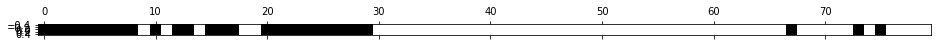

In [86]:
# Plot the selected features
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [87]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()

# Calculate the score for all data
logreg.fit(X_train, y_train)
print('The score of logistic regression on all features: {:.3f}'.format(
logreg.score(X_test, y_test)))

# Calculate for the selected data
logreg.fit(X_train_selected, y_train)
print('The score of logistic regression on the selected features: {:.3f}'.format(
logreg.score(X_test_selected, y_test)))

The score of logistic regression on all features: 0.930
The score of logistic regression on the selected features: 0.958


In [5]:
# Select new features columns
cols = select.get_support(indices=1)
new_features = X_train_selected[cols]
print(len(new_features))
# Create DF with than
df = pd.DataFrame(X_train_selected, columns=new_features)
print(df.shape)

40
(284, 40)


In [131]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

percentile = [i for i in range(1, 100)]
select = SelectPercentile()

pipeline_lr = Pipeline([('select', select), ('lr', LogisticRegression())])
grids_lr = GridSearchCV(pipeline_lr, {'select__percentile': percentile}, cv=5, iid=False, scoring='precision')
grids_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7ff4199faa28>)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'select__percentile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=

In [132]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [133]:
grids_lr_scores = [result for result in grids_lr.cv_results_['mean_test_score']]
grids_lr.cv_results_

{'mean_fit_time': array([0.00261679, 0.00164609, 0.00132265, 0.00136924, 0.00137835,
        0.00150723, 0.00156741, 0.00161219, 0.00165243, 0.00167608,
        0.00173516, 0.00181279, 0.001858  , 0.00185461, 0.0019124 ,
        0.00193205, 0.00202899, 0.00220594, 0.00223246, 0.0022284 ,
        0.00234761, 0.0024374 , 0.00259852, 0.00258579, 0.0026382 ,
        0.0026052 , 0.00263381, 0.00265679, 0.00264196, 0.00281477,
        0.00277643, 0.00287037, 0.00304556, 0.00305457, 0.00304193,
        0.00297461, 0.00307736, 0.00306363, 0.00306125, 0.00342498,
        0.00302625, 0.00349784, 0.00367837, 0.00330563, 0.00331841,
        0.00348921, 0.00346065, 0.00349283, 0.00369096, 0.00358119,
        0.00376582, 0.00368423, 0.00372066, 0.00380826, 0.00404973,
        0.00540524, 0.00491176, 0.00417662, 0.00473738, 0.0048296 ,
        0.00451961, 0.00431337, 0.00422568, 0.00389299, 0.00390668,
        0.00395904, 0.00394497, 0.00401282, 0.0040473 , 0.00458975,
        0.0052381 , 0.00506959,

0.9508521303258146
{'select__percentile': 31}


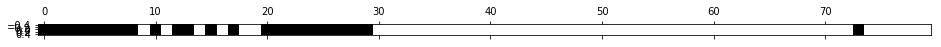

In [134]:
print(grids_lr.best_score_)
print(grids_lr.best_params_)
# Features selected:
mask_lr = grids_lr.best_estimator_.named_steps[
    'select'].get_support()
plt.matshow(mask_lr.reshape(1, -1), cmap='gray_r')

In [135]:
from sklearn.svm import SVC

pipeline_svc = Pipeline([('select', select), ('svc', SVC(gamma='auto', kernel='linear'))])
grids_svc = GridSearchCV(pipeline_svc, {'select__percentile': percentile}, iid=False, scoring='precision')
grids_svc.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7ff4199faa28>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'select__percentile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn

In [136]:
grids_svc_scores = [result for result in grids_svc.cv_results_['mean_test_score']]
grids_svc.cv_results_

{'mean_fit_time': array([0.00217128, 0.00187826, 0.00181667, 0.00186936, 0.00193032,
        0.04542637, 0.31808893, 0.03914873, 0.1599257 , 0.15866407,
        0.39898332, 0.24919907, 1.51236002, 0.56869666, 0.58864689,
        1.04413366, 0.17187738, 0.39094758, 0.35848792, 0.36264865,
        1.14614995, 0.20122576, 0.58434629, 0.56401436, 0.23274136,
        0.30345297, 0.40202498, 0.4033517 , 0.38947225, 0.59467562,
        0.41352232, 0.24016833, 0.2325054 , 0.21852398, 0.36798636,
        0.30048569, 0.33674391, 0.3175323 , 0.313423  , 0.27825999,
        0.38683963, 0.18738921, 0.18906808, 0.17434327, 0.16874671,
        0.18051187, 0.17258128, 0.17205604, 0.1493233 , 0.18247962,
        0.21052829, 0.14627369, 0.14602462, 0.16350365, 0.09988968,
        0.08190807, 0.16163238, 0.16233635, 0.10731117, 0.11343567,
        0.0950373 , 0.09485698, 0.07486304, 0.07327231, 0.07607086,
        0.07364329, 0.07395728, 0.07451804, 0.06713065, 0.08287668,
        0.06482339, 0.06468209,

0.9659911272433958
{'select__percentile': 23}


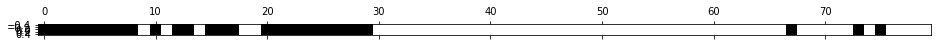

In [138]:
print(grids_svc.best_score_)
print(grids_svc.best_params_)
# Features selected:
mask_svc = grids_svc.best_estimator_.named_steps[
    'select'].get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

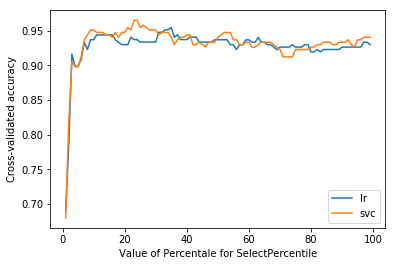

In [51]:
# Plot scores vs parameter
# https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
plt.plot(percentile, grids_lr_scores)
plt.plot(percentile, grids_svc_scores)
plt.xlabel('Value of Percentale for SelectPercentile')
plt.ylabel('Cross-validated accuracy')
plt.legend(['lr', 'svc'])

In [121]:
# https://stackoverflow.com/questions/38105539/
# how-to-convert-a-scikit-learn-dataset-to-a-
# pandas-dataset
print(cancer['feature_names'])
print(type(cancer['feature_names']))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<type 'numpy.ndarray'>


## References
* [How do I properly use SelectKBest, GridSearchCV, and cross-validation in the sklearn package together?](https://www.quora.com/How-do-I-properly-use-SelectKBest-GridSearchCV-and-cross-validation-in-the-sklearn-package-together)
* [How to find the best model parameters in scikit-learn
](https://www.youtube.com/watch?v=Gol_qOgRqfA&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=8)
* [Selecting dimensionality reduction with Pipeline and GridSearchCV](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html)
* [Optimal Tuning Parameters](https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/?fbclid=IwAR3KvYWSfzzHBApouJpbFAktEV99eugzN9WXVViZnd8hJaWZ_bFnv8XlLNM)